In [2]:
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)
import numpy
print('numpy:', numpy.__version__)
import scipy
print('scipy:', scipy.__version__)
import matplotlib
print('matplotlib:', matplotlib.__version__)
import sklearn
print('scikit-learn:', sklearn.__version__)
import pandas as pd
print('pandas:', pd.__version__)

IPython: 7.31.1
numpy: 1.21.6
scipy: 1.7.3
matplotlib: 3.5.2
scikit-learn: 1.0.2
pandas: 1.3.5


In [3]:
dataset = pd.read_csv('../data/raw/dataset_phishing.csv')
pd.options.display.max_columns = None
dataset.head()

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0               19   0        3           0      0      0       0      0   
1               23   1        1           0      0      0       0      0   
2               50   1        4           1      0      1       2      0   
3               11   0        2           0      0      0       0      0   
4               15   0        2           2      0      0       0      0   

   nb_eq  nb_underscore  nb_tilde  nb_percent  nb_slash  nb_star  nb_colon  \
0      0              0         0           0         3        0         1   
1      0              0         0           0         5        0         1   
2      3              2         0           0         5        0         1   
3      0              0         0           0         2        0         1   
4      0              0         0           0         5        0         1   

   nb_comma  nb_semicolumn  nb_dollar  nb_space  nb_www  nb_com  nb_dslash  \
0         0              0          0         0       1       0          0   
1         0              0          0         0       0       0          0   
2         0              0          0         0       0       1          0   
3         0              0          0         0       0       0          0   
4         0              0          0         0       1       0          0   

   http_in_path  https_token  ratio_digits_url  ratio_digits_host  punycode  \
0             0            1          0.000000                0.0         0   
1             0            1          0.220779                0.0         0   
2             0            0          0.150794                0.0         0   
3             0            1          0.000000                0.0         0   
4             0            1          0.000000                0.0         0   

   port  tld_in_path  tld_in_subdomain  abnormal_subdomain  nb_subdomains  \
0     0            0                 0                   0              3   
1     0            0                 0                   0              1   
2     0            0                 1                   0              3   
3     0            0                 0                   0              2   
4     0            0                 0                   0              2   

   prefix_suffix  random_domain  shortening_service  path_extension  \
0              0              0                   0               0   
1              0              0                   0               0   
2              1              0                   0               0   
3              0              0                   0               0   
4              0              0                   0               0   

   nb_redirection  nb_external_redirection  length_words_raw  char_repeat  \
0               0                        0                 4            4   
1               1                        0                 4            4   
2               1                        0                12            2   
3               1                        0                 1            0   
4               1                        0                 6            3   

   shortest_words_raw  shortest_word_host  shortest_word_path  \
0                   3                   3                   3   
1                   2                  19                   2   
2                   2                   3                   2   
3                   5                   5                   0   
4                   3                   3                   4   

   longest_words_raw  long

In [4]:
dataset.shape

(11430, 89)

In [5]:
dataset.dtypes

url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object

In [6]:
dataset.isna().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [7]:
# describe the dataset to get a feel for the  all data
dataset.describe(include='all')


url    length_url  \
count                                               11430  11430.000000   
unique                                              11429           NaN   
top     http://e710z0ear.du.r.appspot.com/c:/users/use...           NaN   
freq                                                    2           NaN   
mean                                                  NaN     61.126684   
std                                                   NaN     55.297318   
min                                                   NaN     12.000000   
25%                                                   NaN     33.000000   
50%                                                   NaN     47.000000   
75%                                                   NaN     71.000000   
max                                                   NaN   1641.000000   

        length_hostname            ip       nb_dots    nb_hyphens  \
count      11430.000000  11430.000000  11430.000000  11430.000000   
unique              NaN           NaN           NaN           NaN   
top                 NaN           NaN           NaN           NaN   
freq                NaN           NaN           NaN           NaN   
mean          21.090289      0.150569      2.480752      0.997550   
std           10.777171      0.357644      1.369686      2.087087   
min            4.000000      0.000000      1.000000      0.000000   
25%           15.000000      0.000000      2.000000      0.000000   
50%           19.000000      0.000000      2.000000      0.000000   
75%           24.000000      0.000000      3.000000      1.000000   
max          214.000000      1.000000     24.000000     43.000000   

               nb_at         nb_qm        nb_and    nb_or         nb_eq  \
count   11430.000000  11430.000000  11430.000000  11430.0  11430.000000   
unique           NaN           NaN           NaN      NaN           NaN   
top              NaN           NaN           NaN      NaN           NaN   
freq             NaN           NaN           NaN      NaN           NaN   
mean        0.022222      0.141207      0.162292      0.0      0.293176   
std         0.155500      0.364456      0.821337      0.0      0.998317   
min         0.000000      0.000000      0.000000      0.0      0.000000   
25%         0.000000      0.000000      0.000000      0.0      0.000000   
50%         0.000000      0.000000      0.000000      0.0      0.000000   
75%         0.000000      0.000000      0.000000      0.0      0.000000   
max         4.000000      3.000000     19.000000      0.0     19.000000   

        nb_underscore      nb_tilde    nb_percent      nb_slash       nb_star  \
count    11430.000000  11430.000000  11430.000000  11430.000000  11430.000000   
unique            NaN           NaN           NaN           NaN           NaN   
top               NaN           NaN           NaN           NaN           NaN   
freq              NaN           NaN           NaN           NaN           NaN   
mean         0.322660      0.006649      0.123097      4.289589      0.000700   
std          1.093336      0.081274      1.466450      1.882251      0.026448   
min          0.000000      0.000000      0.000000      2.000000      0.000000   
25%          0.000000      0.000000      0.000000      3.000000      0.000000   
50%          0.000000      0.000000      0.000000      4.000000      0.000000   
75%          0.000000      0.000000      0.000000      5.000000      0.000000   
max         18.000000      1.000000     96.000000     33.000000      1.000000   

            nb_colon      nb_comma  nb_semicolumn     nb_dollar      nb_space  \
count   11430.000000  11430.000000   11430.000000  11430.000000  11430.000000   
unique           NaN           NaN            NaN           NaN           NaN   
top              NaN           NaN            NaN           NaN           NaN   
freq             NaN           NaN            NaN           NaN           NaN   
mean        1.027909      0.004024       0.06

array([[<AxesSubplot:title={'center':'length_url'}>,
        <AxesSubplot:title={'center':'length_hostname'}>,
        <AxesSubplot:title={'center':'ip'}>,
        <AxesSubplot:title={'center':'nb_dots'}>,
        <AxesSubplot:title={'center':'nb_hyphens'}>,
        <AxesSubplot:title={'center':'nb_at'}>,
        <AxesSubplot:title={'center':'nb_qm'}>,
        <AxesSubplot:title={'center':'nb_and'}>,
        <AxesSubplot:title={'center':'nb_or'}>],
       [<AxesSubplot:title={'center':'nb_eq'}>,
        <AxesSubplot:title={'center':'nb_underscore'}>,
        <AxesSubplot:title={'center':'nb_tilde'}>,
        <AxesSubplot:title={'center':'nb_percent'}>,
        <AxesSubplot:title={'center':'nb_slash'}>,
        <AxesSubplot:title={'center':'nb_star'}>,
        <AxesSubplot:title={'center':'nb_colon'}>,
        <AxesSubplot:title={'center':'nb_comma'}>,
        <AxesSubplot:title={'center':'nb_semicolumn'}>],
       [<AxesSubplot:title={'center':'nb_dollar'}>,
        <AxesSubplot:title=

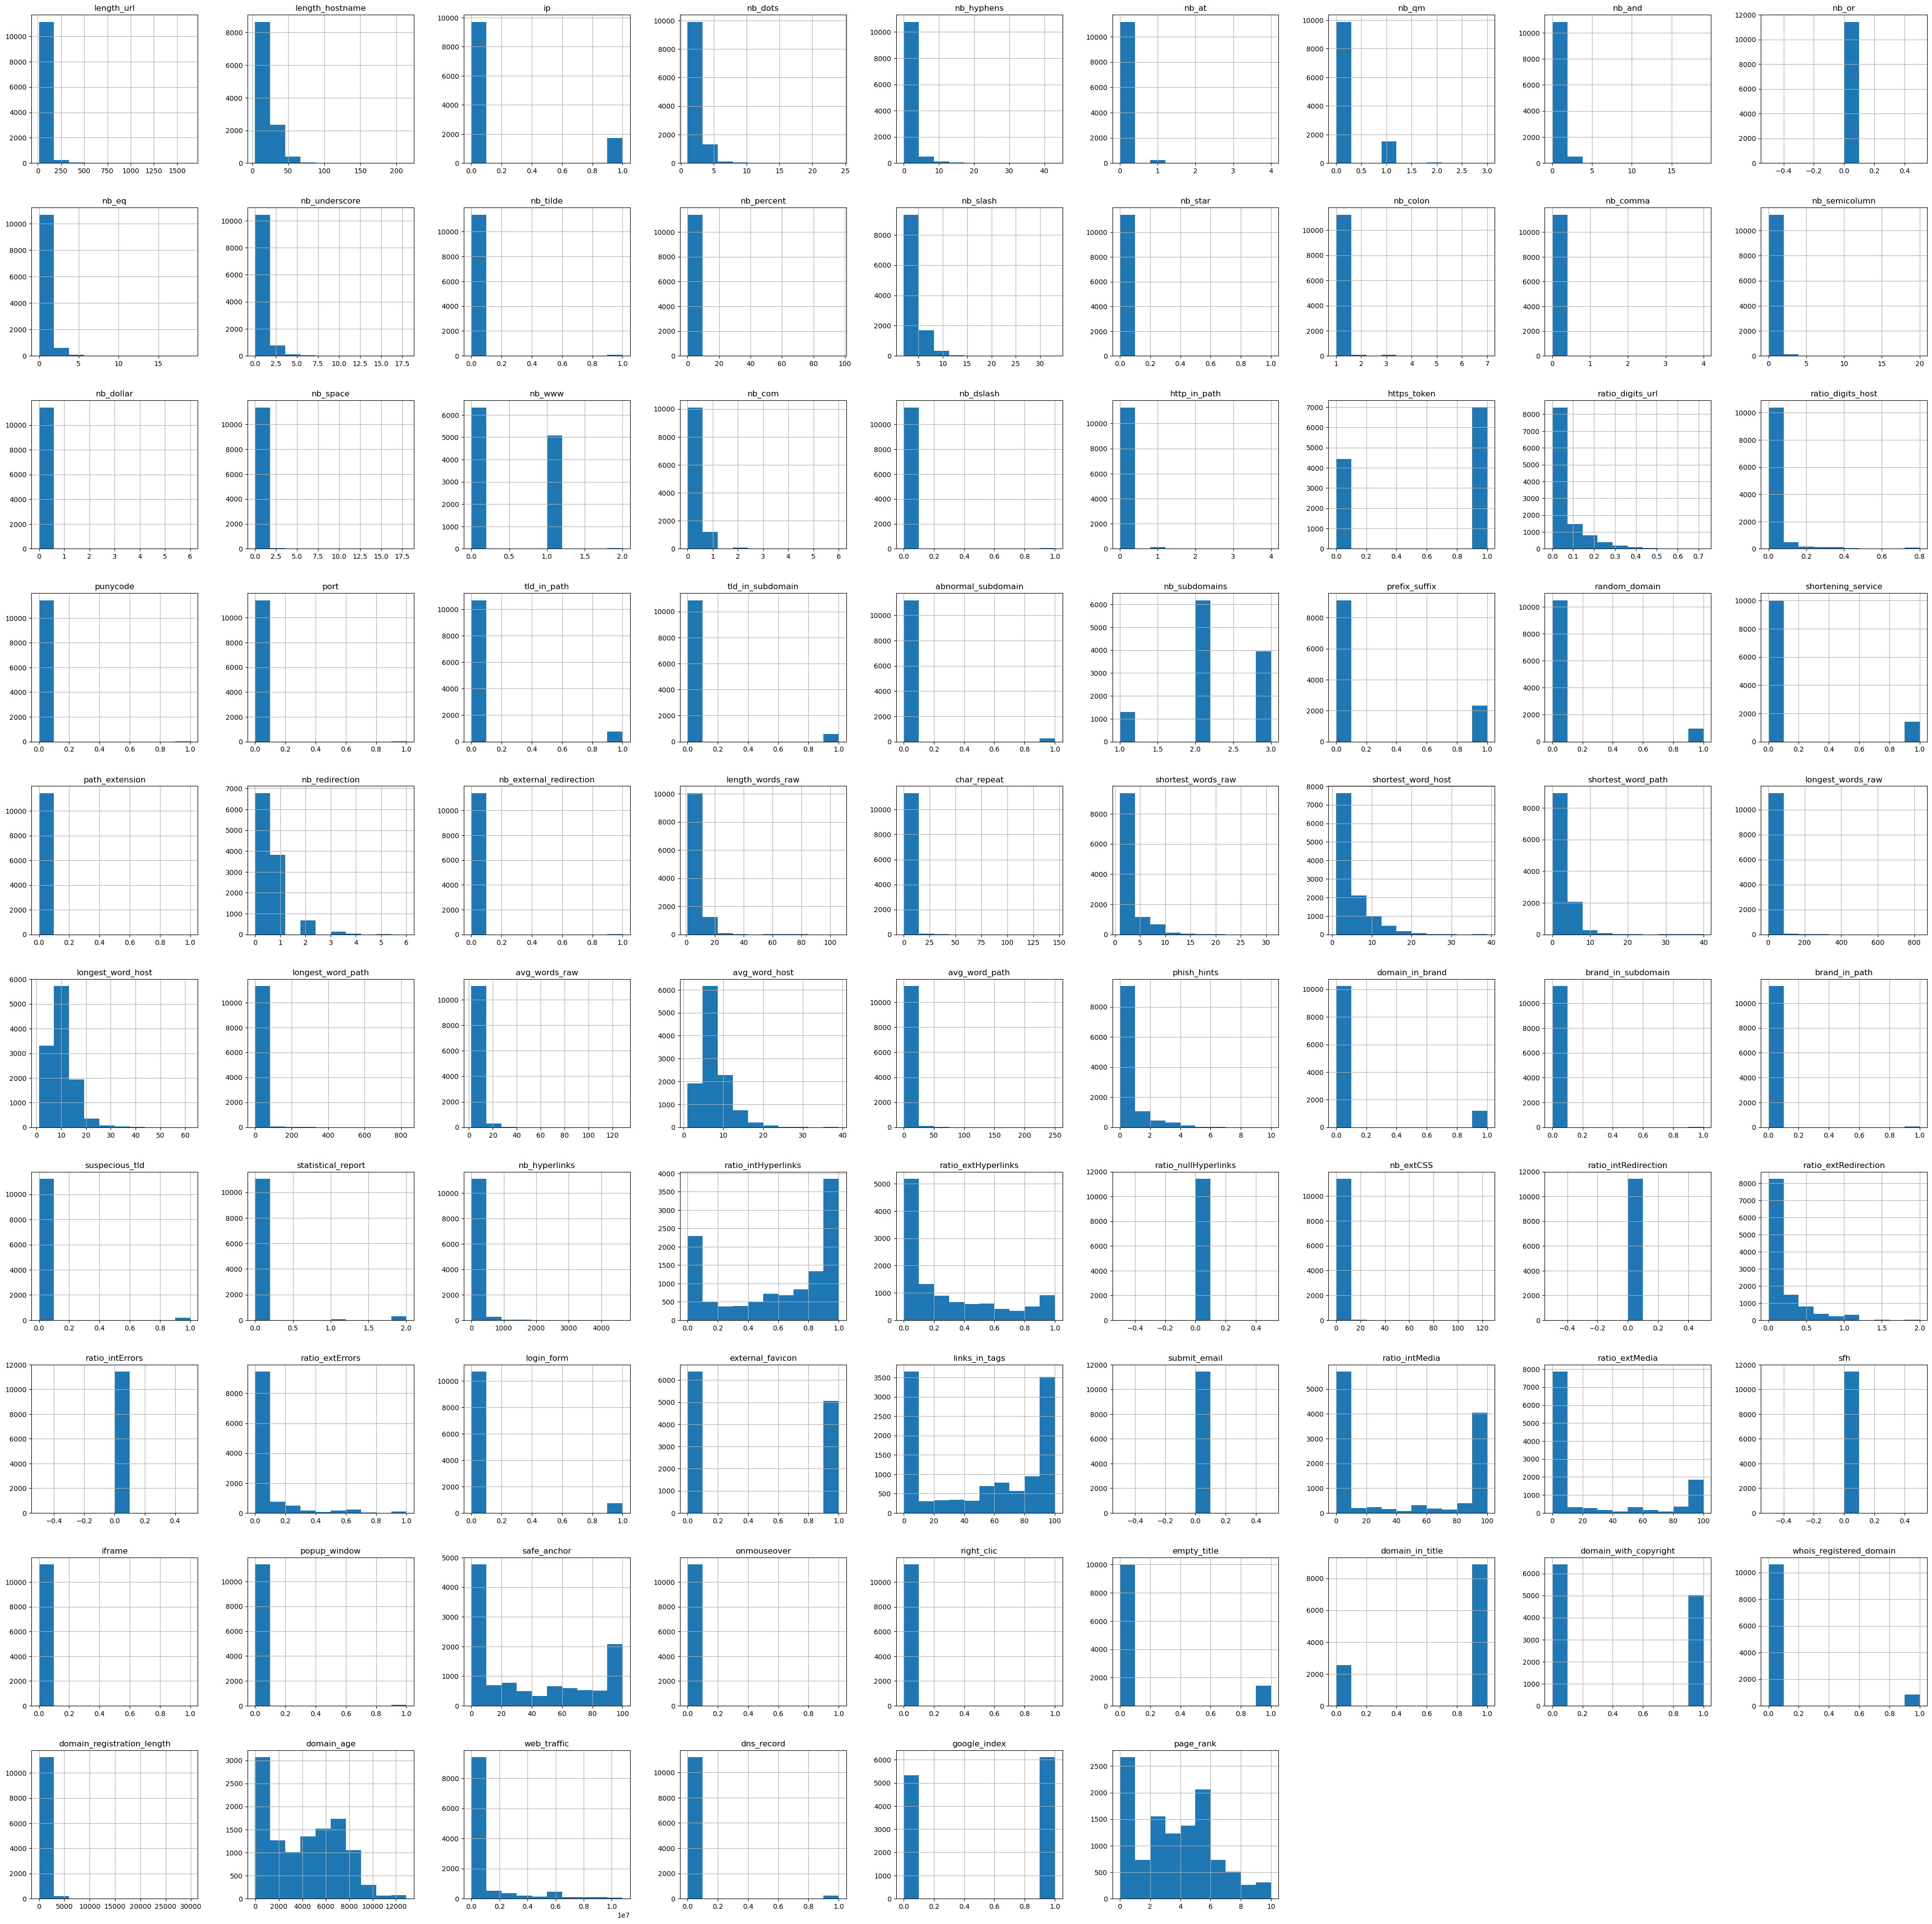

In [8]:
#Visualizar los datos usando gráficos de barra, histograma, dispersión, etc. para explorar las relaciones entre las variables.
dataset.hist(figsize=(50,50))

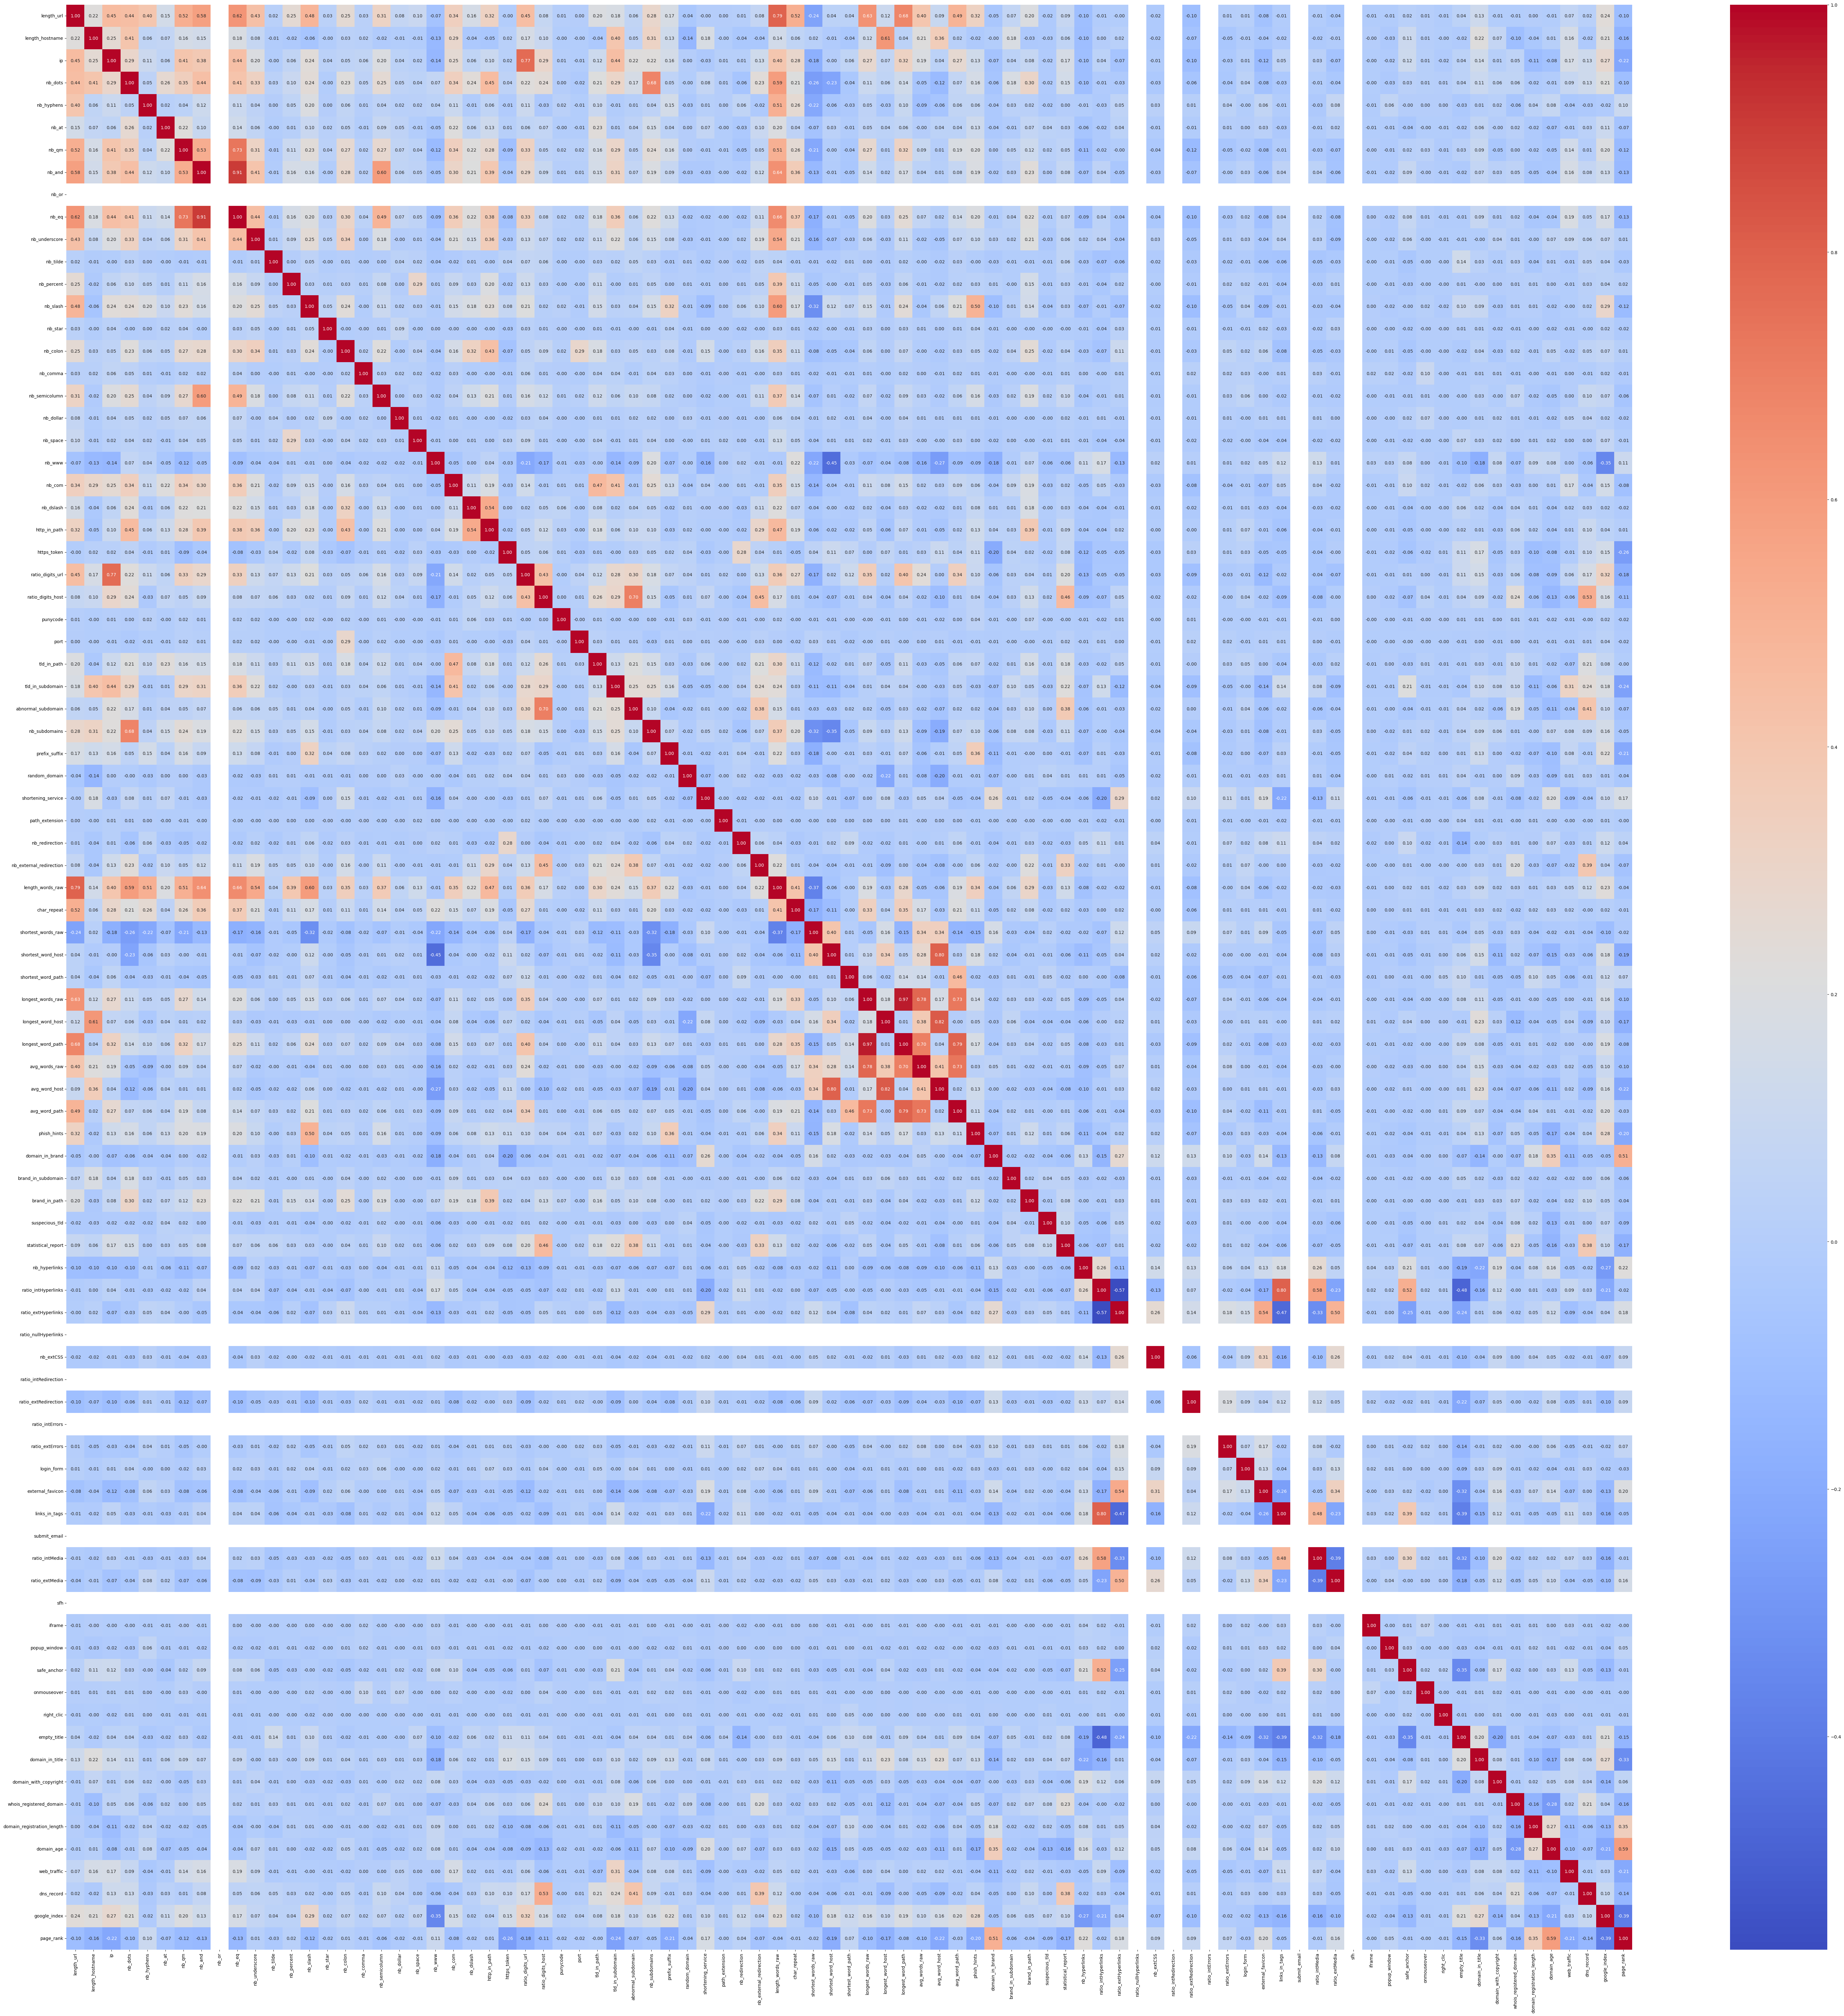

In [10]:
# Buscar correlaciones entre variables mediante el cálculo de la matriz de correlación o la representación gráfica de la misma usando un mapa de calor.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(80,80))
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

